In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"]= (5.0,4.0)
plt.rcParams["image.interpolation"]= "nearest"
plt.rcParams["image.cmap"] = "gray"
np.random.seed(1)

In [4]:
def zero_pad(X,pad):
    X_pad= np.pad(x,((0,0),(pad,pad),(pad,pad),(0,0)),"constant")
    return X_pad

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
z_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


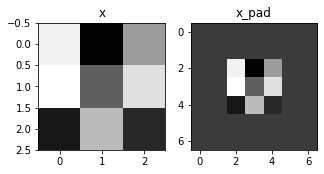

In [5]:
np.random.seed(1)
x = np.random.randn(4,3,3,2)
X_pad = zero_pad(x,2)
print("x.shape =",x.shape)
print("x_pad.shape =",X_pad.shape)
print("x[1,1] =",X_pad[1,1])
print("z_pad[1,1] =",X_pad[1,1])

fig, axarr = plt.subplots(1,2)
axarr[0].set_title("x")
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title("x_pad")
axarr[1].imshow(X_pad[0,:,:,0])


In [6]:
def conv_single_step(a_slice_prev,w,b):
    s = np.multiply(a_slice_prev,w)
    z = np.sum(s)
    z = float(b)+z
    return z


In [7]:
np.random.seed(1)
a_slice_prev = np.random.randn(4,4,3)

w = np.random.randn(4,4,3) # içinde rasgele sayılar tanımlı olan 4,4,3 lük bir tensor tanımlıyor

b = np.random.randn(1,1,1)

z = conv_single_step(a_slice_prev,w,b)

print("z =",z)

z = -6.999089450680221


In [15]:
def conv_forward(A_prev,W,b,hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C ) = W.shape
    stride = hparametres["stride"]
    pad = hparametres["pad"]

    n_H = int(((n_H_prev-f+2*pad)/stride)+1)
    n_W = int(((n_W_prev-f+2*pad)/stride)+1)

    z = np.zeros([m,n_H_prev,n_W,n_C])
    A_prev_pad = zero_pad(A_prev,pad)

    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            for w in range(n_C):
                vert_start = h*stride
                vert_end = vert_start+f
                horiz_start = W*stride
                horiz_end = horiz_start+f

                a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end]
                Z[i,h,w,c] = conv_single_step(a_slice_prev,W[...,c],b[...,c])
    assert(Z.shape==(m,h,w,c))
    cache = (A_prev,W,b,hparameters)
    return Z,cache
    

In [23]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad":2,
               "stride":2}
Z , cache_conv = conv_forward(A_prev,W,b,hparameters)

ValueError: ignored